### Babaahmadi-Narges-610398102-HW1
### importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import more_itertools as mit

#### Reading input file
Here i read the input file and find the number of the cities. After that i change the input matrix such that all rows contain exactly 28 elements(number of the cities-1).
changing the matrix in this way, helps me in making the fitness function.

In [2]:
def input_maker(path):
    #reading the testcase
    file = open(path)
    input_raw = file.read()
    file.close()
    
    #making matris from the file so that it's easier to use it
    input_mat = input_raw.split('\n')
    number_of_towns = int(input_mat[3].split(':')[-1].strip())
    
    #making the town's matrix
    town_mat = []
    for i in range (8, 36):
        help_arr = input_mat[i].split()
        for i in range(len(help_arr)):
            help_arr[i] = int(help_arr[i])
        m = number_of_towns - len(help_arr)
        for i in range(m):
            help_arr.insert(0,0)
            
        town_mat.append(help_arr)

    return town_mat, number_of_towns

### fitness function
In the box bellow i calculated the fitness function using the matrix i made in the last cell.
(i also considered that the salesman will come back from the last city(chromosome[number_of_towns-1] to the first city (chromosome[0]))

In [3]:
#coding the fitness function 
def fitness_func(chromosome):
    overall_cost=0
    
    for i in range(len(chromosome)-1):
        if chromosome[i]<chromosome[i+1]:
            overall_cost += town_mat[chromosome[i]][chromosome[i+1]]
            
        elif chromosome[i] > chromosome[i+1]:
            overall_cost += town_mat[chromosome[i+1]][chromosome[i]]
    if chromosome[0] < chromosome[number_of_towns - 1]:
        overall_cost += town_mat[chromosome[0]][chromosome[number_of_towns-1]]
    elif chromosome[0] > chromosome[number_of_towns - 1]:
        overall_cost += town_mat[chromosome[number_of_towns-1]][chromosome[0]]
    return overall_cost

### making the society
To make the society, i made random permutations of numbers from 0 to (number_of_towns - 1). Then to visualize my society i made a dataframe from the society and their costs.

In [4]:
#with respect to the number of the population, we make the society
def make_society(population):
    society = []
    for i in range(population):
        society.append(mit.random_permutation(range(number_of_towns)))
        
    fitness = []
    for chromosome in society:
        fitness.append(fitness_func(chromosome))
        
    df = pd.DataFrame({'society':society,'fitnesses':fitness})
    print(df)
    return society, df

### choosing parents for crossover
In truncation function, first I divid my data frame. One part has T percent of the population and the othe part has (100-T) percent(obviously:)).\
Then , from the first T percent, i randomly chosed N chromosomes.

In [5]:
#choosing parents using truncation method
def truncation(T,N):
    df2 = df.sort_values(by=['fitnesses'])
    T_num = int((T/100)*(len(df2)))
    df2 = df2.head(T_num)
    df2 = df2.sample(N)

    return df2

### crossover
I used order recombination method in here, which means the constructed child has inherited indexes (point1) to (point2) from the first chromosome, and other indexes comes from the second chromosome. 

In [6]:
def order_recombination(chromosome1, chromosome2, point1, point2):
    child = []
    for i in range(number_of_towns):
        child.append(-1)
        
    for i in range(point1, point2+1):
        child[i] = chromosome1[i]
        
    counter = point2+1
    for i in range(point2+1, number_of_towns):
        if (chromosome2[i] not in child):
            child[counter] = chromosome2[i]
            counter+=1
            
    for i in range(point2+1):
        if(chromosome2[i] not in child):
            if counter < number_of_towns :
                child[counter] = chromosome2[i]
                counter+=1
            else:
                counter = 0
                child[counter] = chromosome2[i]
                counter+=1

    return child

### mutation
In order to change the children a bit, so that I don't get stuch in local optimized point, i did mutation on some of the children.\
My mutation function mirrors indexes 4,5,6 to 9,8,7 respectively. 

In [7]:
#implementing mutation
def mutation(chromosome):
    #mirroring the elements between index 4 and index 9
    help_int = 0
    index = 9
    for i in range(4,7):
        help_int = chromosome[index]
        chromosome[index] = chromosome[i]
        chromosome[i] = help_int
        index-=1
    return chromosome

### main part 
in this part I iterate for 100 times.\
usefull information about my variables are included in the comments.

In [8]:
global children
global town_mat
global number_of_towns
global society
global df

population = 5000

# N is the number of parents that i choose 
N = 1000

# T is the percentage of population that i choose N from 
T = 30

#child_num is the number of children I make in each iteration
child_num = 1500

#child_percentage is the percentage of children that i mutate
child_percentage = 10

#In mean array, I store the mean of different iterations.
#In min1 array I store the minimum of different iterations.
mean = []
min1 = []

town_mat, number_of_towns = input_maker("bayg29.tsp")
society,df = make_society(population)

for i in range(100):
    society = truncation(T, N)['society'].to_list()
    children =[]

    #making the children
    for i in range(child_num):
        res = []
        for j in range(2):
            res.append(np.random.randint(0,N))
        point1 = np.random.randint(0,number_of_towns-1)
        point2 = np.random.randint(point1,number_of_towns-1)
        child = order_recombination(society[res[0]], society[res[1]], point1 , point2)
        children.append(child)
     
    #children mutation
    m = int( (child_percentage/100) * child_num ) # m is the number of children that get mutated

    for i in range(m):
        children[i] = mutation(children[i])
        
    #finding the fittness of the children
    fitness = []
    for child in children:
        fitness.append(fitness_func(child))

    #making a data frame for children
    df_children  = pd.DataFrame({'society':children,'fitnesses':fitness})
    
    df = df.sort_values(by=['fitnesses'])   
    df = df.head(population - child_num)
    
    #adding children to our society
    frames = [df, df_children]
    df = pd.concat(frames)
    df2 = df.sort_values(by=['fitnesses'])
    
    me= df2['fitnesses'].mean()
    mi = df2['fitnesses'].min()
    mean.append(me)
    min1.append(mi)

    print(df2)

                                                society  fitnesses
0     (4, 23, 7, 16, 25, 9, 26, 0, 17, 28, 8, 22, 18...       4734
1     (27, 11, 26, 24, 1, 25, 14, 20, 8, 19, 6, 7, 1...       4975
2     (21, 27, 20, 19, 23, 7, 16, 28, 17, 4, 26, 8, ...       5163
3     (17, 14, 21, 11, 8, 22, 10, 18, 3, 28, 20, 2, ...       4187
4     (23, 13, 21, 5, 19, 14, 28, 16, 12, 6, 24, 11,...       4481
...                                                 ...        ...
4995  (20, 15, 27, 0, 18, 2, 6, 4, 26, 8, 21, 19, 5,...       5371
4996  (9, 14, 8, 26, 17, 12, 21, 4, 2, 1, 11, 13, 5,...       4987
4997  (1, 14, 13, 9, 3, 28, 0, 19, 6, 4, 22, 11, 21,...       4972
4998  (11, 7, 28, 19, 5, 16, 25, 0, 9, 18, 15, 10, 2...       5250
4999  (19, 24, 18, 8, 6, 25, 10, 13, 12, 5, 28, 4, 7...       4685

[5000 rows x 2 columns]
                                                society  fitnesses
4093  (4, 2, 20, 5, 18, 24, 6, 11, 8, 0, 12, 27, 23,...       3266
1771  (20, 4, 19, 18, 14, 16, 13, 1, 

                                                society  fitnesses
807   [4, 5, 3, 21, 19, 1, 18, 23, 26, 7, 27, 11, 15...       2869
1178  [21, 16, 0, 1, 19, 28, 25, 3, 10, 14, 18, 12, ...       2877
819   [6, 24, 17, 21, 16, 14, 3, 22, 7, 23, 8, 5, 27...       2906
190   [21, 16, 1, 19, 28, 25, 3, 10, 14, 18, 12, 15,...       2930
249   [1, 4, 8, 2, 25, 7, 0, 15, 16, 14, 19, 13, 17,...       2932
...                                                 ...        ...
1473  [23, 3, 14, 10, 2, 7, 11, 4, 27, 1, 25, 21, 16...       4355
1381  [15, 4, 24, 16, 10, 25, 26, 6, 21, 19, 22, 27,...       4392
1374  [8, 2, 23, 18, 14, 12, 6, 9, 4, 5, 24, 21, 16,...       4479
635   [11, 2, 10, 6, 12, 21, 17, 14, 15, 3, 27, 24, ...       4500
1071  [17, 21, 13, 9, 15, 8, 5, 6, 4, 7, 2, 27, 14, ...       4519

[5000 rows x 2 columns]
                                                society  fitnesses
388   [21, 19, 1, 18, 23, 26, 6, 24, 22, 7, 27, 11, ...       2752
364   [23, 7, 0, 22, 26, 11, 17, 14, 

                                                society  fitnesses
547   [5, 12, 19, 9, 14, 16, 13, 10, 21, 17, 18, 6, ...       2501
1377  [21, 16, 1, 19, 3, 10, 18, 14, 12, 24, 6, 22, ...       2533
359   [1, 16, 21, 17, 24, 6, 22, 13, 10, 14, 12, 18,...       2553
1305  [11, 8, 2, 28, 25, 1, 14, 13, 17, 6, 18, 16, 2...       2557
394   [21, 16, 17, 13, 3, 10, 18, 14, 12, 6, 24, 22,...       2580
...                                                 ...        ...
5     [7, 6, 9, 17, 24, 14, 19, 10, 21, 13, 15, 12, ...       3917
814   [18, 7, 16, 14, 15, 8, 24, 13, 17, 10, 21, 3, ...       3955
1195  [8, 25, 4, 10, 16, 18, 3, 27, 7, 26, 22, 15, 1...       4008
1251  [23, 26, 9, 15, 10, 16, 19, 12, 24, 25, 27, 5,...       4019
139   [27, 15, 3, 17, 11, 8, 0, 19, 1, 10, 5, 12, 2,...       4048

[5000 rows x 2 columns]
                                                society  fitnesses
547   [5, 12, 19, 9, 14, 16, 13, 10, 21, 17, 18, 6, ...       2501
1377  [21, 16, 1, 19, 3, 10, 18, 14, 

                                                society  fitnesses
268   [22, 26, 9, 17, 13, 21, 10, 16, 19, 1, 2, 5, 1...       2238
1438  [21, 16, 17, 13, 3, 10, 18, 14, 12, 24, 6, 22,...       2292
1085  [12, 9, 14, 16, 13, 10, 21, 17, 18, 6, 24, 22,...       2325
1293  [19, 12, 3, 10, 17, 16, 21, 13, 14, 18, 6, 24,...       2328
287   [26, 9, 1, 17, 13, 21, 10, 16, 19, 2, 5, 11, 8...       2340
...                                                 ...        ...
90    [23, 7, 15, 27, 10, 13, 19, 11, 3, 12, 14, 9, ...       3544
102   [2, 25, 1, 18, 3, 10, 23, 26, 20, 13, 19, 11, ...       3562
1143  [16, 13, 6, 28, 2, 25, 8, 26, 11, 9, 21, 19, 1...       3596
129   [14, 13, 16, 4, 6, 12, 20, 1, 2, 28, 24, 3, 15...       3616
131   [4, 20, 0, 25, 24, 14, 10, 21, 1, 2, 6, 22, 19...       3703

[5000 rows x 2 columns]
                                                society  fitnesses
268   [22, 26, 9, 17, 13, 21, 10, 16, 19, 1, 2, 5, 1...       2238
1438  [21, 16, 17, 13, 3, 10, 18, 14,

                                                society  fitnesses
688   [17, 14, 15, 26, 22, 6, 24, 23, 0, 12, 7, 27, ...       2147
1260  [3, 14, 10, 21, 16, 13, 17, 18, 6, 24, 9, 1, 4...       2153
738   [18, 24, 6, 22, 26, 15, 19, 9, 1, 20, 5, 27, 1...       2174
164   [18, 24, 6, 15, 22, 26, 23, 7, 27, 20, 8, 4, 2...       2180
1096  [14, 18, 24, 6, 26, 22, 25, 2, 28, 4, 8, 11, 5...       2188
...                                                 ...        ...
137   [15, 4, 28, 2, 11, 23, 19, 26, 8, 25, 7, 1, 14...       3334
1089  [25, 20, 3, 8, 5, 0, 1, 15, 12, 7, 26, 23, 9, ...       3336
42    [23, 22, 6, 26, 28, 25, 7, 27, 4, 14, 2, 3, 19...       3349
31    [9, 12, 3, 17, 1, 26, 23, 22, 15, 21, 5, 16, 1...       3396
119   [21, 10, 12, 6, 2, 27, 4, 5, 15, 22, 28, 25, 1...       3424

[5000 rows x 2 columns]
                                                society  fitnesses
688   [17, 14, 15, 26, 22, 6, 24, 23, 0, 12, 7, 27, ...       2147
1260  [3, 14, 10, 21, 16, 13, 17, 18,

                                                society  fitnesses
1191  [17, 13, 21, 10, 16, 19, 1, 20, 8, 25, 2, 28, ...       2003
404   [26, 7, 27, 0, 5, 11, 20, 4, 28, 2, 25, 8, 1, ...       2013
276   [22, 26, 15, 0, 23, 27, 5, 7, 11, 4, 1, 28, 2,...       2018
1170  [6, 22, 26, 7, 23, 15, 12, 0, 27, 11, 4, 5, 25...       2018
891   [18, 24, 6, 22, 26, 23, 15, 7, 19, 1, 28, 2, 2...       2019
...                                                 ...        ...
610   [23, 27, 0, 24, 6, 3, 20, 11, 5, 21, 4, 28, 2,...       3093
98    [7, 27, 20, 4, 21, 17, 13, 19, 5, 11, 3, 9, 12...       3118
1264  [26, 1, 20, 19, 4, 28, 2, 8, 11, 5, 27, 22, 15...       3124
1384  [16, 28, 12, 14, 18, 24, 2, 25, 4, 11, 8, 5, 1...       3191
95    [7, 13, 3, 10, 25, 4, 19, 9, 15, 14, 28, 2, 8,...       3248

[5000 rows x 2 columns]
                                                society  fitnesses
690   [1, 25, 28, 2, 8, 11, 5, 0, 12, 23, 19, 9, 3, ...       1912
343   [24, 6, 22, 26, 7, 27, 23, 15, 

                                                society  fitnesses
1160  [15, 7, 23, 0, 27, 5, 11, 8, 4, 28, 2, 25, 20,...       1821
1194  [26, 7, 23, 15, 0, 27, 5, 8, 11, 4, 28, 2, 25,...       1864
957   [27, 5, 11, 4, 28, 2, 25, 8, 20, 1, 19, 9, 12,...       1865
196   [26, 7, 23, 15, 0, 27, 11, 4, 5, 25, 28, 2, 8,...       1868
1342  [26, 7, 23, 15, 0, 8, 5, 27, 11, 4, 28, 2, 25,...       1869
...                                                 ...        ...
59    [25, 4, 8, 7, 1, 20, 5, 11, 27, 0, 18, 24, 23,...       2868
565   [0, 5, 7, 27, 4, 8, 2, 28, 11, 16, 13, 24, 6, ...       2869
87    [7, 27, 17, 10, 20, 11, 5, 15, 23, 13, 4, 28, ...       2890
8     [2, 25, 8, 3, 23, 0, 28, 21, 16, 17, 4, 5, 27,...       2972
83    [2, 28, 5, 11, 17, 21, 16, 12, 3, 27, 10, 18, ...       3047

[5000 rows x 2 columns]
                                                society  fitnesses
1160  [15, 7, 23, 0, 27, 5, 11, 8, 4, 28, 2, 25, 20,...       1821
532   [26, 15, 23, 7, 0, 25, 28, 2, 4

                                               society  fitnesses
835  [5, 8, 11, 4, 28, 2, 25, 20, 1, 19, 9, 12, 3, ...       1705
418  [11, 8, 4, 28, 2, 25, 20, 1, 19, 9, 12, 3, 10,...       1722
412  [0, 27, 11, 4, 5, 8, 25, 28, 2, 20, 1, 19, 9, ...       1725
891  [23, 28, 2, 25, 8, 4, 5, 11, 27, 0, 20, 1, 19,...       1735
886  [26, 23, 15, 7, 0, 27, 11, 5, 8, 4, 2, 28, 25,...       1736
..                                                 ...        ...
46   [11, 8, 17, 13, 28, 4, 14, 10, 16, 21, 2, 25, ...       2596
0    [27, 11, 20, 4, 13, 1, 8, 25, 2, 28, 10, 14, 1...       2606
12   [27, 11, 20, 4, 17, 1, 8, 25, 2, 28, 13, 14, 1...       2688
18   [28, 2, 25, 8, 10, 13, 21, 19, 12, 1, 24, 5, 1...       2775
5    [27, 14, 13, 21, 2, 28, 25, 5, 17, 16, 8, 20, ...       2781

[5000 rows x 2 columns]
                                                society  fitnesses
1372  [15, 7, 0, 27, 11, 5, 8, 4, 2, 28, 25, 20, 1, ...       1699
835   [5, 8, 11, 4, 28, 2, 25, 20, 1, 19, 9, 12, 

                                                society  fitnesses
1233  [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1624
182   [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1624
1494  [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1624
465   [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1624
1059  [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1639
...                                                 ...        ...
142   [8, 4, 14, 5, 19, 1, 20, 0, 27, 11, 9, 12, 3, ...       2373
560   [13, 10, 18, 24, 11, 5, 28, 2, 25, 8, 4, 20, 1...       2375
135   [5, 11, 4, 8, 15, 1, 20, 25, 28, 2, 6, 19, 12,...       2388
56    [5, 11, 4, 28, 1, 20, 25, 2, 21, 8, 12, 19, 9,...       2397
33    [28, 24, 2, 25, 1, 20, 4, 11, 5, 8, 19, 9, 12,...       2399

[5000 rows x 2 columns]
                                                society  fitnesses
1233  [5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, ...       1624
182   [5, 11, 8, 25, 2, 28, 4, 20, 1,

                                                society  fitnesses
736   [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17,...       1610
587   [5, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, ...       1617
647   [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17,...       1620
919   [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, 14,...       1622
627   [8, 25, 2, 28, 4, 20, 1, 19, 9, 12, 3, 14, 17,...       1622
...                                                 ...        ...
36    [8, 25, 2, 28, 12, 9, 19, 1, 20, 4, 3, 14, 13,...       2268
52    [8, 4, 28, 2, 9, 19, 1, 6, 20, 25, 12, 3, 14, ...       2288
1142  [11, 8, 28, 4, 6, 2, 25, 20, 1, 19, 9, 12, 3, ...       2292
93    [8, 25, 2, 28, 12, 9, 19, 1, 20, 4, 3, 14, 17,...       2299
50    [8, 2, 25, 13, 19, 1, 20, 4, 28, 16, 9, 12, 3,...       2342

[5000 rows x 2 columns]
                                               society  fitnesses
736  [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17,...       1610
587  [5, 8, 25, 2, 28, 4, 20, 1, 19, 9,

In [9]:
print(min1)
print(mean)

[3266, 2964, 2964, 2964, 2964, 2964, 2964, 2932, 2869, 2869, 2752, 2752, 2665, 2665, 2665, 2580, 2580, 2557, 2557, 2501, 2501, 2409, 2406, 2325, 2325, 2325, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2206, 2174, 2174, 2174, 2174, 2147, 2147, 2147, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 1912, 1912, 1911, 1911, 1869, 1869, 1869, 1865, 1865, 1821, 1821, 1821, 1801, 1801, 1736, 1736, 1705, 1705, 1705, 1705, 1705, 1699, 1696, 1696, 1656, 1653, 1624, 1624, 1624, 1624, 1624, 1624, 1624, 1624, 1622, 1622, 1617, 1617, 1617, 1617, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610]
[4512.2512, 4358.6558, 4233.0132, 4125.1142, 4023.307, 3932.5618, 3849.8888, 3769.5844, 3698.152, 3629.228, 3566.3354, 3504.9338, 3447.1536, 3394.2416, 3342.942, 3295.981, 3251.5252, 3207.6516, 3165.2282, 3127.8008, 3084.5286, 3049.1616, 3014.6608, 2981.7136, 2952.159, 2924.367, 2896.0814, 2867.2142, 2838.5924, 2815.3492, 2787.8636, 2761.6844, 2738.0394, 2712.862, 2691.7142, 2666.1978, 2643.4802,

<AxesSubplot:>

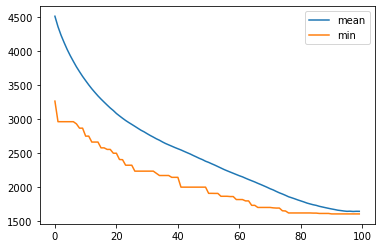

In [10]:
data = pd.DataFrame({'mean':mean, 'min':min1})
data.plot()

### Best chromosome with its fitness

In [11]:
print(df2.head(1))

                                               society  fitnesses
736  [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17,...       1610
